In [3]:
#Import Libraries


import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
#Read xls File and Load to a dataframe

df = pd.read_excel('weather2015_2019(1).xlsx')
#print(df)
df = df.drop(columns = df.columns[13:])
df = df.drop(columns = df.columns[0:2])
df = df.dropna()
df

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
0,Clapp-Library,2015-01-01,00:00:00,1024.1,-8.777778,68.0,-13.611111,0.0,0.00000,157.5,1.78816
1,Clapp-Library,2015-01-01,00:30:00,1028.0,-6.555556,49.0,-15.500000,0.0,2.23520,270.0,8.04672
2,Clapp-Library,2015-01-01,01:00:00,1028.2,-6.833333,50.0,-15.555556,0.0,1.78816,247.5,6.25856
3,Clapp-Library,2015-01-01,01:30:00,1029.3,-7.222222,52.0,-15.444444,0.0,3.12928,225.0,6.70560
4,Clapp-Library,2015-01-01,02:00:00,1029.5,-7.000000,53.0,-15.000000,0.0,4.02336,225.0,7.59968
...,...,...,...,...,...,...,...,...,...,...,...
97031,Clapp-Library,2020-07-13,08:30:00,1011.1,23.222222,84.0,20.388889,0.0,0.44704,135.0,1.78816
97032,Clapp-Library,2020-07-13,09:00:00,1011.0,24.611111,76.0,20.111111,0.0,0.00000,135.0,1.34112
97033,Clapp-Library,2020-07-13,09:30:00,1011.1,24.888889,74.0,19.944444,0.0,0.44704,135.0,2.23520
97034,Clapp-Library,2020-07-13,10:00:00,1011.0,26.444444,70.0,20.555556,0.0,0.00000,202.5,1.34112


In [5]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)
#df["Date"] = pd.to_datetime(df["Date"]).dt.date
#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)
df.describe()

,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
count,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000
mean,1020.288802,10.018659,69.048727,4.092463,0.052497,2.326678,207.855350,5.782999
std,8.501196,10.533485,18.276788,11.026103,0.364100,1.852109,104.181948,3.705477
min,975.600000,-24.555556,13.000000,-32.055556,0.000000,0.000000,0.000000,0.447040
25%,1015.000000,1.777778,55.000000,-4.111111,0.000000,0.894080,157.500000,2.682240
50%,1020.100000,9.722222,70.000000,4.055556,0.000000,1.788160,202.500000,5.364480
75%,1025.700000,18.944444,85.000000,13.444444,0.000000,3.576320,292.500000,8.046720
max,1049.200000,35.888889,100.000000,27.000000,18.034000,12.517120,337.500000,28.163520


In [6]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2015_2019 = pd.concat([df2015,df2016,df2017])
df2019_2020 = pd.concat([df2018,df2019,df2020])
df2015_2019

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
2832,Clapp-Library,2015-03-01,00:00:00,1036.0,-10.388889,42.0,-20.888889,0.0,0.00000,315.0,1.34112
2833,Clapp-Library,2015-03-01,00:30:00,1035.9,-10.388889,45.0,-20.055556,0.0,0.00000,315.0,1.34112
2837,Clapp-Library,2015-03-01,02:30:00,1034.9,-12.055556,57.0,-18.833333,0.0,0.00000,315.0,1.34112
2838,Clapp-Library,2015-03-01,03:00:00,1035.0,-12.111111,60.0,-18.277778,0.0,0.44704,315.0,1.78816
2839,Clapp-Library,2015-03-01,03:30:00,1034.9,-12.777778,63.0,-18.388889,0.0,0.89408,315.0,2.68224
...,...,...,...,...,...,...,...,...,...,...,...
40843,Clapp-Library,2017-04-30,21:30:00,1026.9,10.222222,69.0,4.777778,0.0,3.12928,202.5,7.15264
40844,Clapp-Library,2017-04-30,22:00:00,1026.7,9.944444,71.0,4.944444,0.0,2.23520,180.0,5.81152
40845,Clapp-Library,2017-04-30,22:30:00,1026.8,9.777778,71.0,4.777778,0.0,2.23520,180.0,4.91744
40846,Clapp-Library,2017-04-30,23:00:00,1026.4,9.500000,72.0,4.722222,0.0,2.23520,180.0,5.36448


/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/577814791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2019['Barometric Pressure (mbar)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/577814791.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

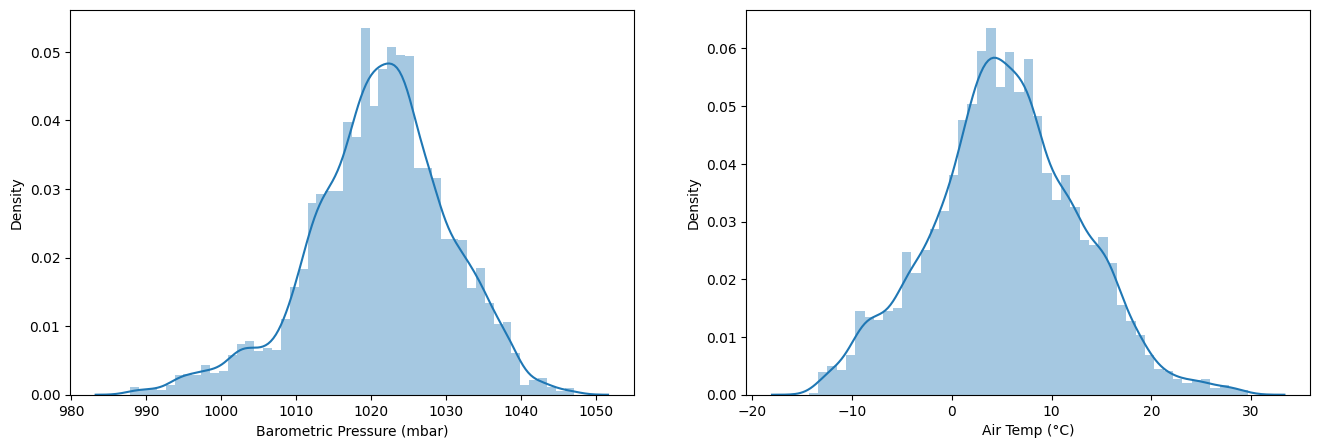

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2015_2019['Barometric Pressure (mbar)'])
plt.subplot(1,2,2)
sns.distplot(df2015_2019['Air Temp (°C)'])
plt.show()

<Axes: >

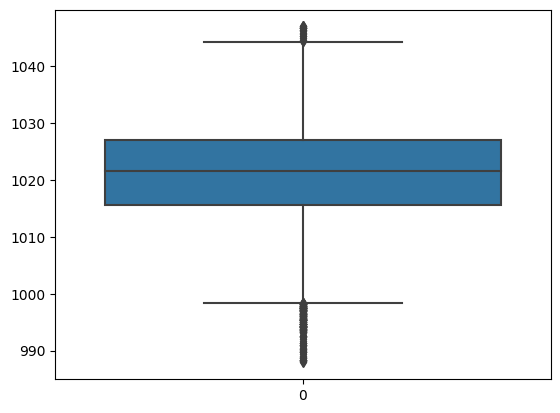

In [8]:
sns.boxplot(df2015_2019['Barometric Pressure (mbar)'].values)

<Axes: >

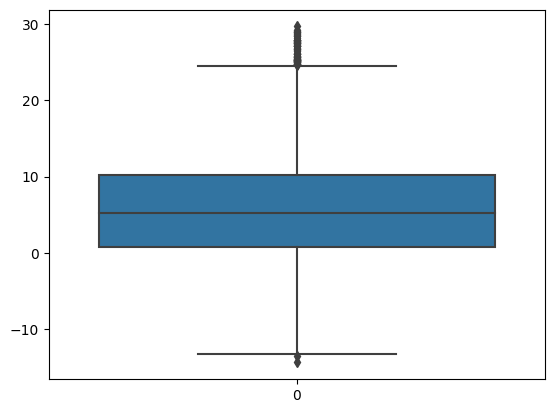

In [9]:
sns.boxplot(df2015_2019['Air Temp (°C)'].values)

In [10]:
#Finding the IQR
percentile25 = df2015_2019['Air Temp (°C)'].quantile(0.25)
percentile75 = df2015_2019['Air Temp (°C)'].quantile(0.75)

In [11]:
#Finding the upper and lower limits
IQR = percentile75 -percentile25
upper_limit = percentile75 + (1.5 * IQR)
lower_limit = percentile25 - (1.5 * IQR)

In [12]:
#Step-7: Finding outliers
df2015_2019[df2015_2019['Air Temp (°C)'] > upper_limit]
df2015_2019[df2015_2019['Air Temp (°C)'] < lower_limit]

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
2984,Clapp-Library,2015-03-04,04:00:00,1032.2,-13.444444,55.0,-20.555556,0.0,1.78816,315.0,4.02336
2991,Clapp-Library,2015-03-04,07:30:00,1034.2,-14.333333,61.0,-20.222222,0.0,0.00000,292.5,1.78816


In [13]:
#Step-8: Trimming outliers
new_df_2015_2019 = df2015_2019[ df2015_2019['Air Temp (°C)']>lower_limit]
new_df_2015_2019 = new_df_2015_2019[new_df_2015_2019['Air Temp (°C)']<upper_limit]
new_df_2015_2019.shape

(8004, 11)

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/718597567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2019['Air Temp (°C)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/718597567.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_2015_20

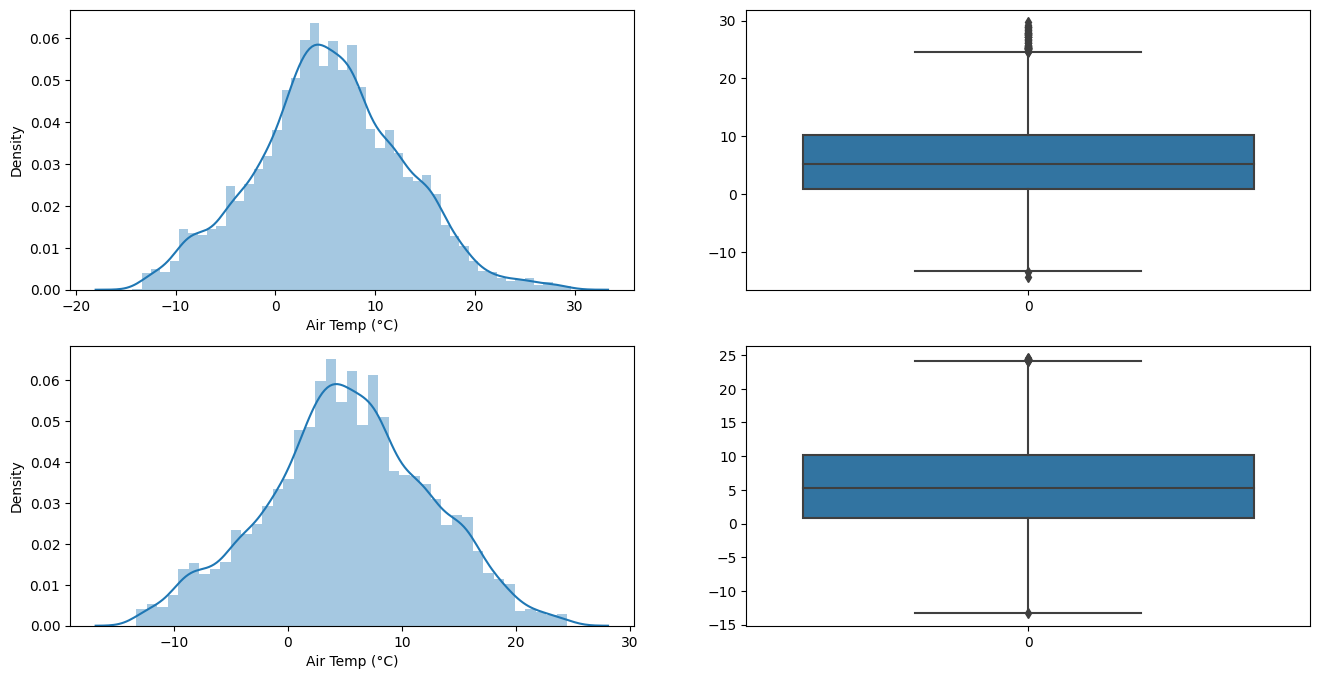

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2015_2019['Air Temp (°C)'])
plt.subplot(2,2,2)
sns.boxplot(df2015_2019['Air Temp (°C)'].values)
plt.subplot(2,2,3)
sns.distplot(new_df_2015_2019['Air Temp (°C)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2015_2019['Air Temp (°C)'].values)
plt.show()

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/2136961307.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2019_2020['Barometric Pressure (mbar)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/2136961307.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

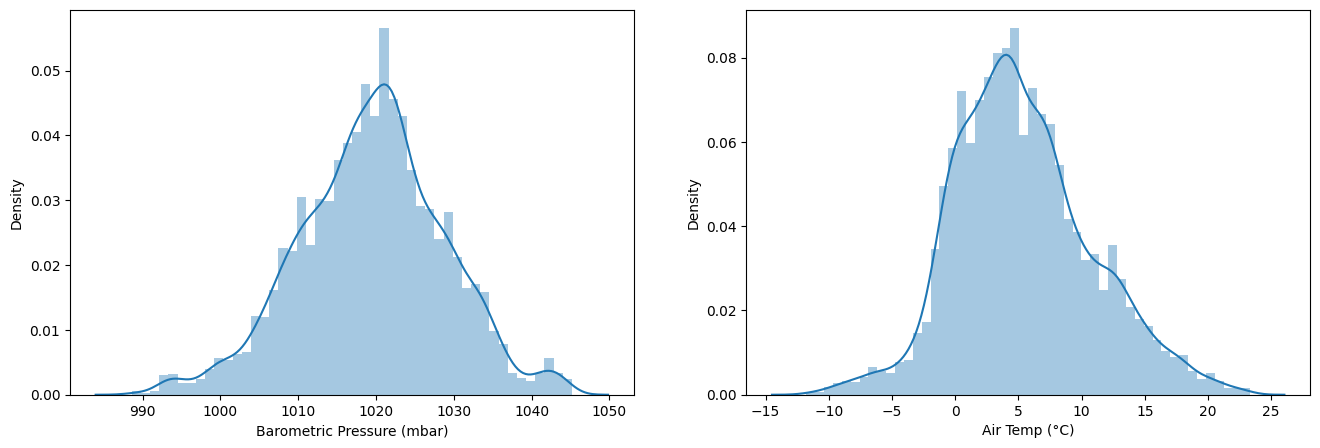

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2019_2020['Barometric Pressure (mbar)'])
plt.subplot(1,2,2)
sns.distplot(df2019_2020['Air Temp (°C)'])
plt.show()

<Axes: >

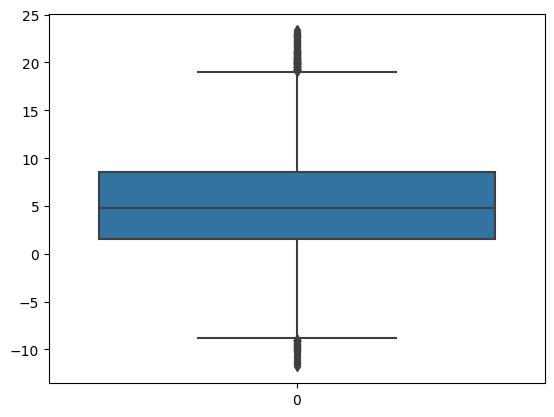

In [16]:
sns.boxplot(df2019_2020['Air Temp (°C)'].values)

In [17]:
#Finding the IQR
percentile25_2020 = df2019_2020['Air Temp (°C)'].quantile(0.25)
percentile75_2020 = df2019_2020['Air Temp (°C)'].quantile(0.75)

1.55555555555555
8.55555555555556


In [18]:
#Finding the upper and lower limits
IQR = percentile75_2020 -percentile25_2020
upper_limit = percentile75_2020 + (1.5 * IQR)
lower_limit = percentile25_2020 - (1.5 * IQR)

7.000000000000011


In [19]:
#Step-7: Finding outliers
df2019_2020[df2019_2020['Air Temp (°C)'] > upper_limit]
df2019_2020[df2019_2020['Air Temp (°C)'] < lower_limit]

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
56317,Clapp-Library,2018-03-18,05:00:00,1016.3,-9.166667,53.0,-17.000000,0.0,1.78816,337.5,4.02336
56318,Clapp-Library,2018-03-18,05:30:00,1016.5,-9.000000,52.0,-17.055556,0.0,0.89408,337.5,2.68224
56319,Clapp-Library,2018-03-18,06:00:00,1017.0,-9.277778,49.0,-18.055556,0.0,1.34112,315.0,4.91744
56320,Clapp-Library,2018-03-18,06:30:00,1017.2,-9.555556,47.0,-18.777778,0.0,2.23520,315.0,5.81152
56321,Clapp-Library,2018-03-18,07:00:00,1017.7,-9.500000,46.0,-19.000000,0.0,2.68224,315.0,5.81152
56322,Clapp-Library,2018-03-18,07:30:00,1017.8,-9.722222,43.0,-20.000000,0.0,4.47040,315.0,8.94080
56324,Clapp-Library,2018-03-18,08:30:00,1018.0,-9.055556,41.0,-19.944444,0.0,4.47040,337.5,8.94080
73220,Clapp-Library,2019-03-05,07:00:00,1022.5,-9.888889,59.0,-16.388889,0.0,0.89408,247.5,2.23520
73221,Clapp-Library,2019-03-05,07:30:00,1022.5,-9.555556,58.0,-16.277778,0.0,0.89408,247.5,2.68224
73222,Clapp-Library,2019-03-05,08:00:00,1022.7,-9.166667,58.0,-15.944444,0.0,1.78816,225.0,4.47040


In [20]:
#Step-8: Trimming outliers
new_df_2020 = df2019_2020[ df2019_2020['Air Temp (°C)']>lower_limit]
new_df_2020 = new_df_2020[new_df_2020['Air Temp (°C)'] < upper_limit]
new_df_2020.shape


(8037, 11)

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/622799359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2019_2020['Air Temp (°C)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_4515/622799359.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_2020['A

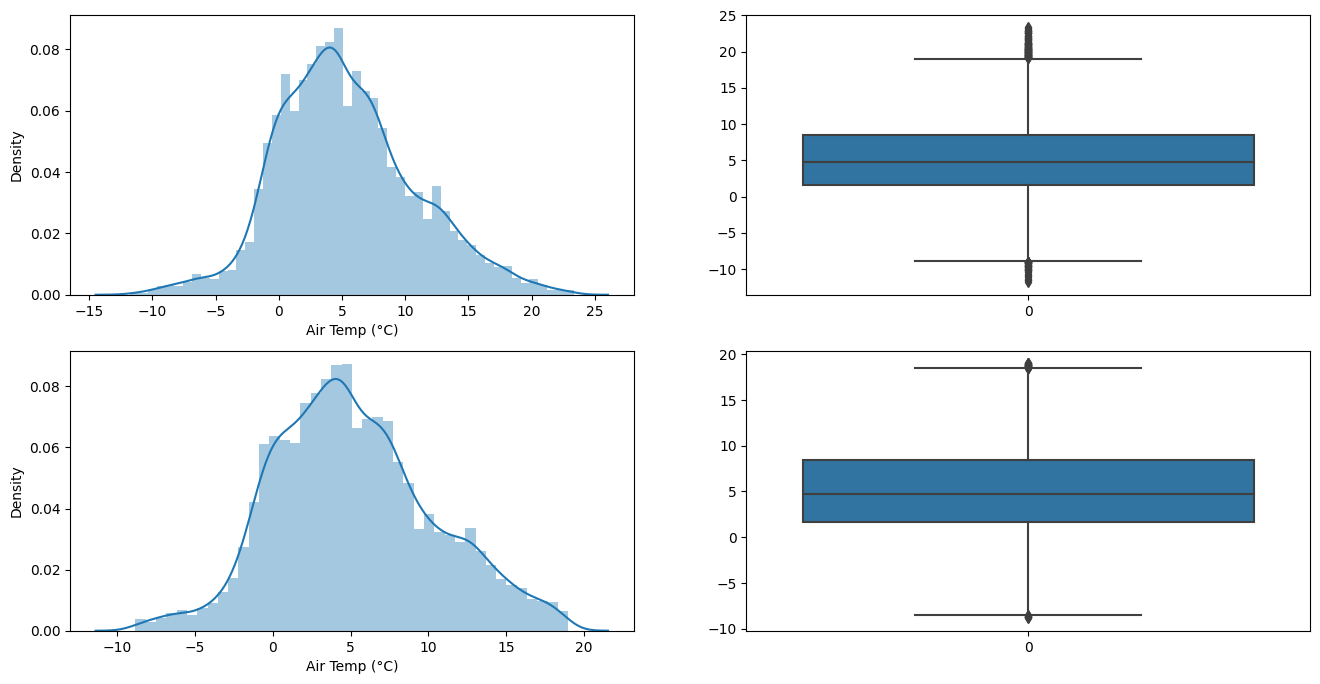

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2019_2020['Air Temp (°C)'])
plt.subplot(2,2,2)
sns.boxplot(df2019_2020['Air Temp (°C)'].values)
plt.subplot(2,2,3)
sns.distplot(new_df_2020['Air Temp (°C)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2020['Air Temp (°C)'].values)
plt.show()

### Case 2-'Barometric Pressure (mbar)'

0.02598904905043342
48.92340349100945


Text(0, 0.5, 'Air Temp (°C)')

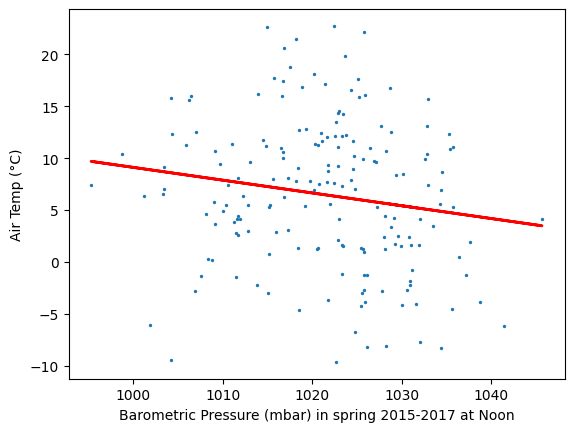

In [34]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_17_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

pre15_17 = df15_17_noon['Barometric Pressure (mbar)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(pre15_17,temp15_17_noon, s=2)
plt.plot(pre15_17, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

0.0022889434410243714
25.754794752735663


(array([ 990., 1000., 1010., 1020., 1030., 1040., 1050.]),
 [Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030'),
  Text(1040.0, 0, '1040'),
  Text(1050.0, 0, '1050')])

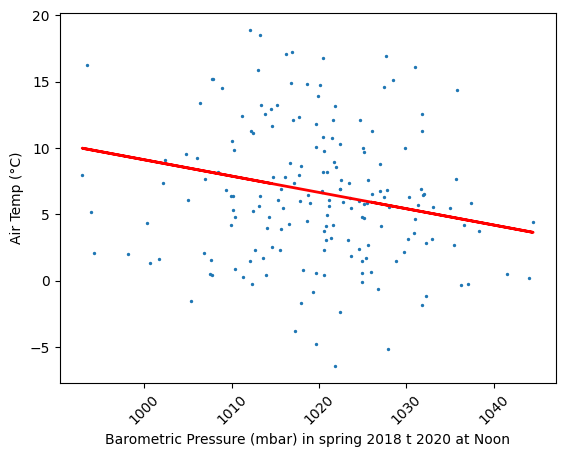

In [35]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2020_noon = new_df_2020[new_df_2020["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Barometric Pressure (mbar)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2018 t 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


### Case 1: Date

0.04442573749264511
47.9973507122219


Text(0, 0.5, 'Air Temp (°C)')

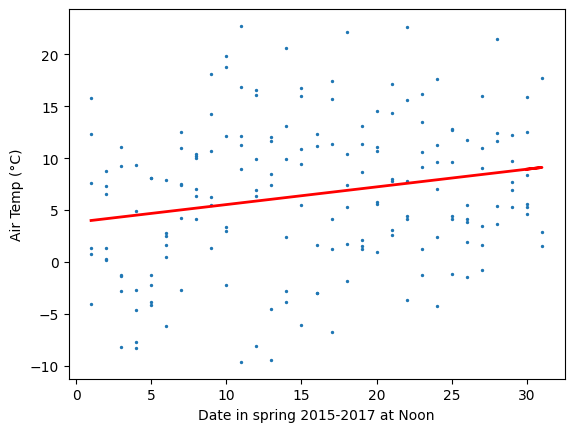

In [32]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_17_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)
#list to store number of predictor variables
predictors=[]

#list to store model scores
MSE_scores=[]
R2_scores=[]

MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

predictors.append(1)
MSE_scores.append(MSE)
R2_scores.append(R2)
plt.scatter(date15_19_noon,temp15_17_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

0.05922563629183675
24.285037723752044


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

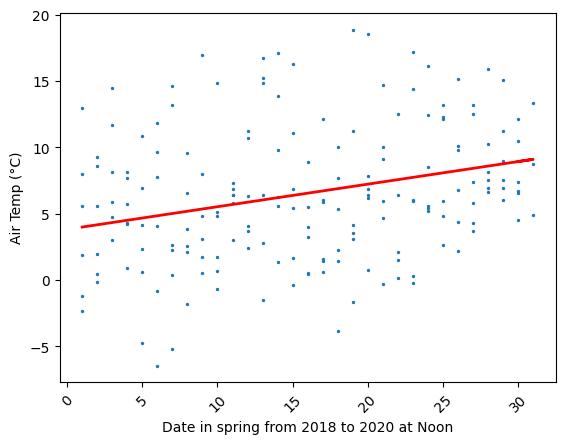

In [33]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2020_noon = new_df_2020[new_df_2020["Time"]== '12:00:00']

date2020_noon = df2020_noon['Date']
temp2020_noon = df2020_noon['Air Temp (°C)']

date2020_noon = date2020_noon.astype(str)
date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)

date2020_noon = date2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(date2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(date2020_noon, temp2020_noon, s = 2)
plt.plot(date2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3- Gust Speed (m/s)

0.020995935251403308
49.1742016168707


Text(0, 0.5, 'Air Temp (°C)')

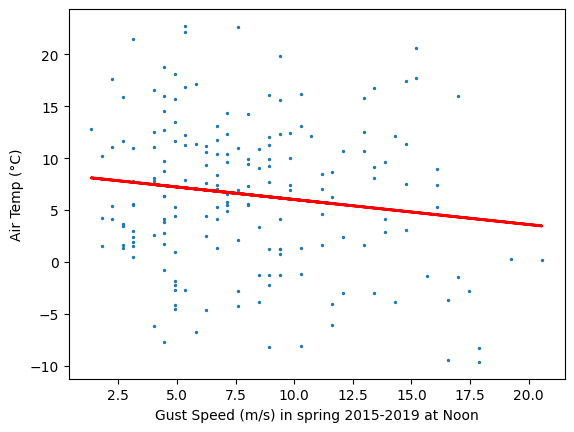

In [37]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

gSpeed15_19 = df15_19_noon['Gust Speed (m/s)']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(gSpeed15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(gSpeed15_19,temp15_19_noon, s=2)
plt.plot(gSpeed15_19, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

0.013940686166771687
25.45401804946018


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

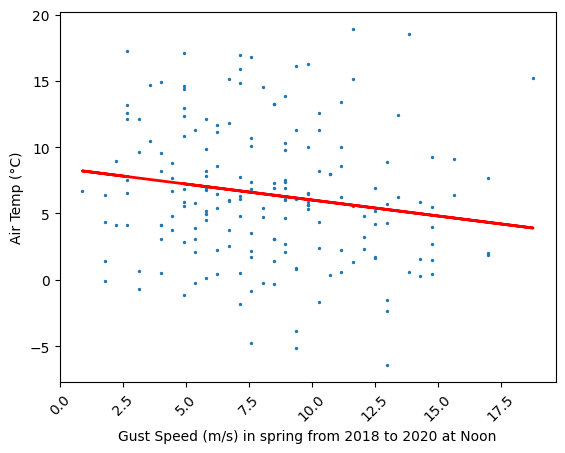

In [38]:
df2020_noon = new_df_2020[new_df_2020["Time"]== '12:00:00']

gSpeed2020_noon = df2020_noon['Gust Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

gSpeed2020_noon = gSpeed2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(gSpeed2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(gSpeed2020_noon, temp2020_noon, s = 2)
plt.plot(gSpeed2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 : Barometric Pressure (mbar) and Gust Speed (m/s)

In [39]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

gSpeed_BP_15_19 = df15_19_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed_BP_15_19 = gSpeed_BP_15_19.to_numpy().reshape(-1,2)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed_BP_15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(gSpeed_BP_15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.06288180525864961
47.07032453321089


In [40]:
df2020_noon = new_df_2020[new_df_2020["Time"]== '12:00:00']

gSpeed_BP_2020_noon = df2020_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

gSpeed_BP_2020_noon = gSpeed_BP_2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(gSpeed_BP_2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.029219982963850644
25.05960009609791


### Case 5: Barometric Pressure (mbar), Gust Speed (m/s), Wind Speed (m/s)

In [41]:
# plot linear regression

df15_17_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,3)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

0.06783537284712449
46.821512766141254


In [42]:
df2020_noon = new_df_2020[new_df_2020["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,3)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.02101001108448941
25.271531335396734
